In [1]:
import reader
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

#### Loading the dataset

In [2]:
data=reader.get_all_data()
data.head()

,Property Crime,Violent Crime,Total Crime,Mean Income (Household),Median Income (Household),Per Capita Income,Income Standard Deviation (Household),Percent High School Dropouts,Percent No Degree
Area_name,,,,,,,,,
"Abbeville, SC",307.60,52.200000,359.800000,41909,33495,16772,34343.940433,23.1,40.358297
"Acadia, LA",569.25,45.000000,614.250000,47311,33882,17704,45056.661852,31.7,32.914498
"Accomack, VA",536.40,70.000000,606.400000,53054,40343,22013,54183.047090,23.7,35.937033
"Ada, ID",1079.00,159.333333,1238.333333,71190,55888,27805,62231.762371,7.5,47.240193
"Adair, IA",44.20,4.600000,48.800000,52090,43487,22897,43287.290392,7.8,29.580117


### Data Visualization

#### Plotting histograms to see the data distribution of each feature

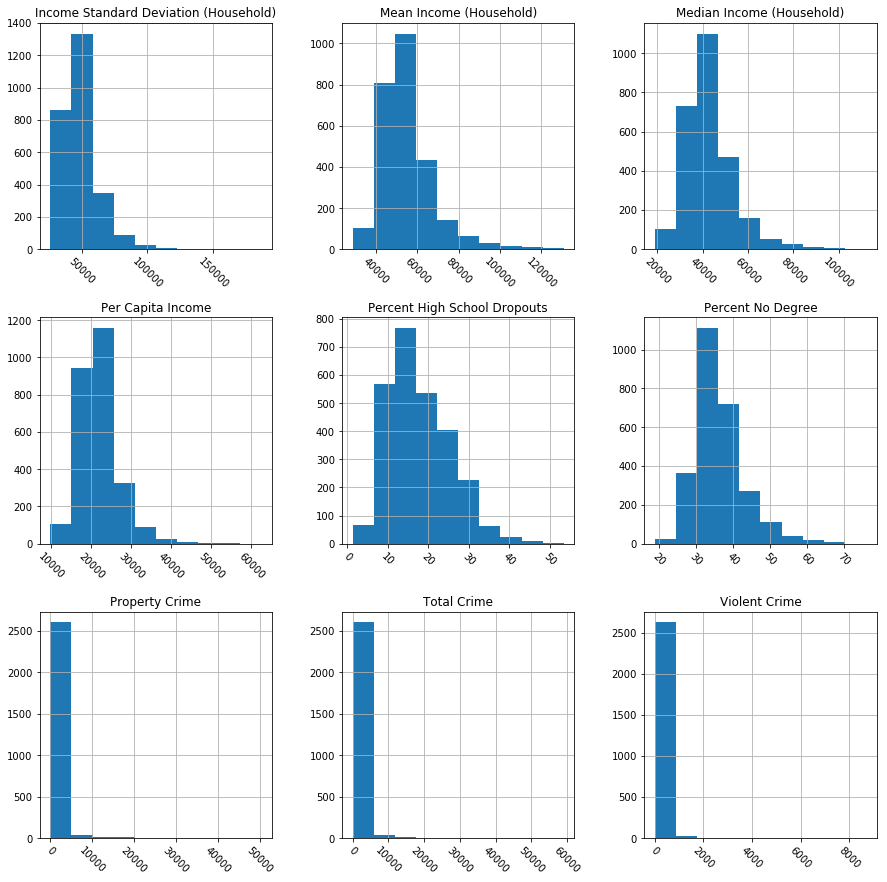

In [3]:
data.hist(figsize=(15,15), xrot=-45, bins=10)
plt.show()

#### Finding correlation between all the features

In [4]:
corrmat = data.corr() 
corrmat

,Property Crime,Violent Crime,Total Crime,Mean Income (Household),Median Income (Household),Per Capita Income,Income Standard Deviation (Household),Percent High School Dropouts,Percent No Degree
Property Crime,1.000000,0.921718,0.998446,0.306694,0.256655,0.255442,0.265240,-0.071649,0.292814
Violent Crime,0.921718,1.000000,0.941670,0.216137,0.164843,0.171605,0.214408,-0.027148,0.216133
Total Crime,0.998446,0.941670,1.000000,0.296493,0.245838,0.245820,0.260355,-0.066103,0.284417
Mean Income (Household),0.306694,0.216137,0.296493,1.000000,0.950084,0.923479,0.763217,-0.537486,0.671140
Median Income (Household),0.256655,0.164843,0.245838,0.950084,1.000000,0.860398,0.562814,-0.573692,0.574355
Per Capita Income,0.255442,0.171605,0.245820,0.923479,0.860398,1.000000,0.744624,-0.658942,0.654040
Income Standard Deviation (Household),0.265240,0.214408,0.260355,0.763217,0.562814,0.744624,1.000000,-0.312840,0.583867
Percent High School Dropouts,-0.071649,-0.027148,-0.066103,-0.537486,-0.573692,-0.658942,-0.312840,1.000000,-0.430697
Percent No Degree,0.292814,0.216133,0.284417,0.671140,0.574355,0.654040,0.583867,-0.430697,1.000000


#### Plotting the correlation matrix using heatmap

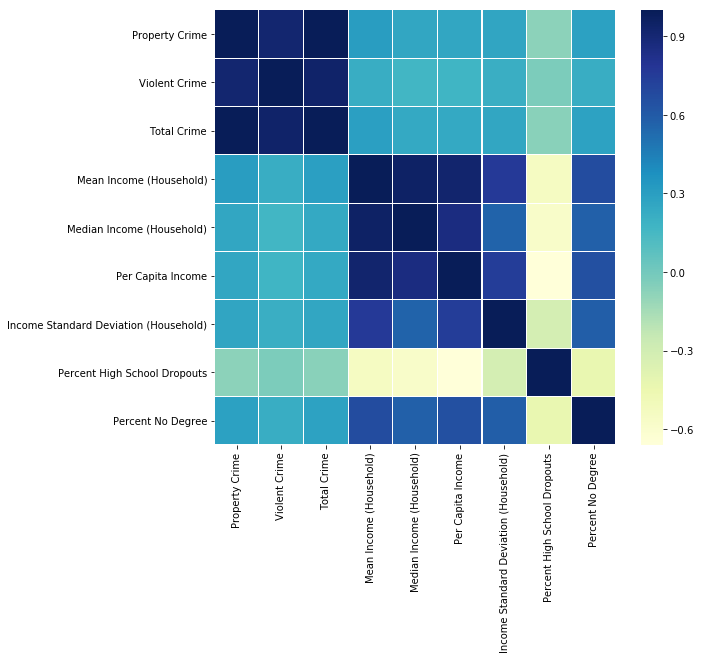

In [5]:
corrmat = data.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

#### Plotting the correlation between features using scatter plot matrix

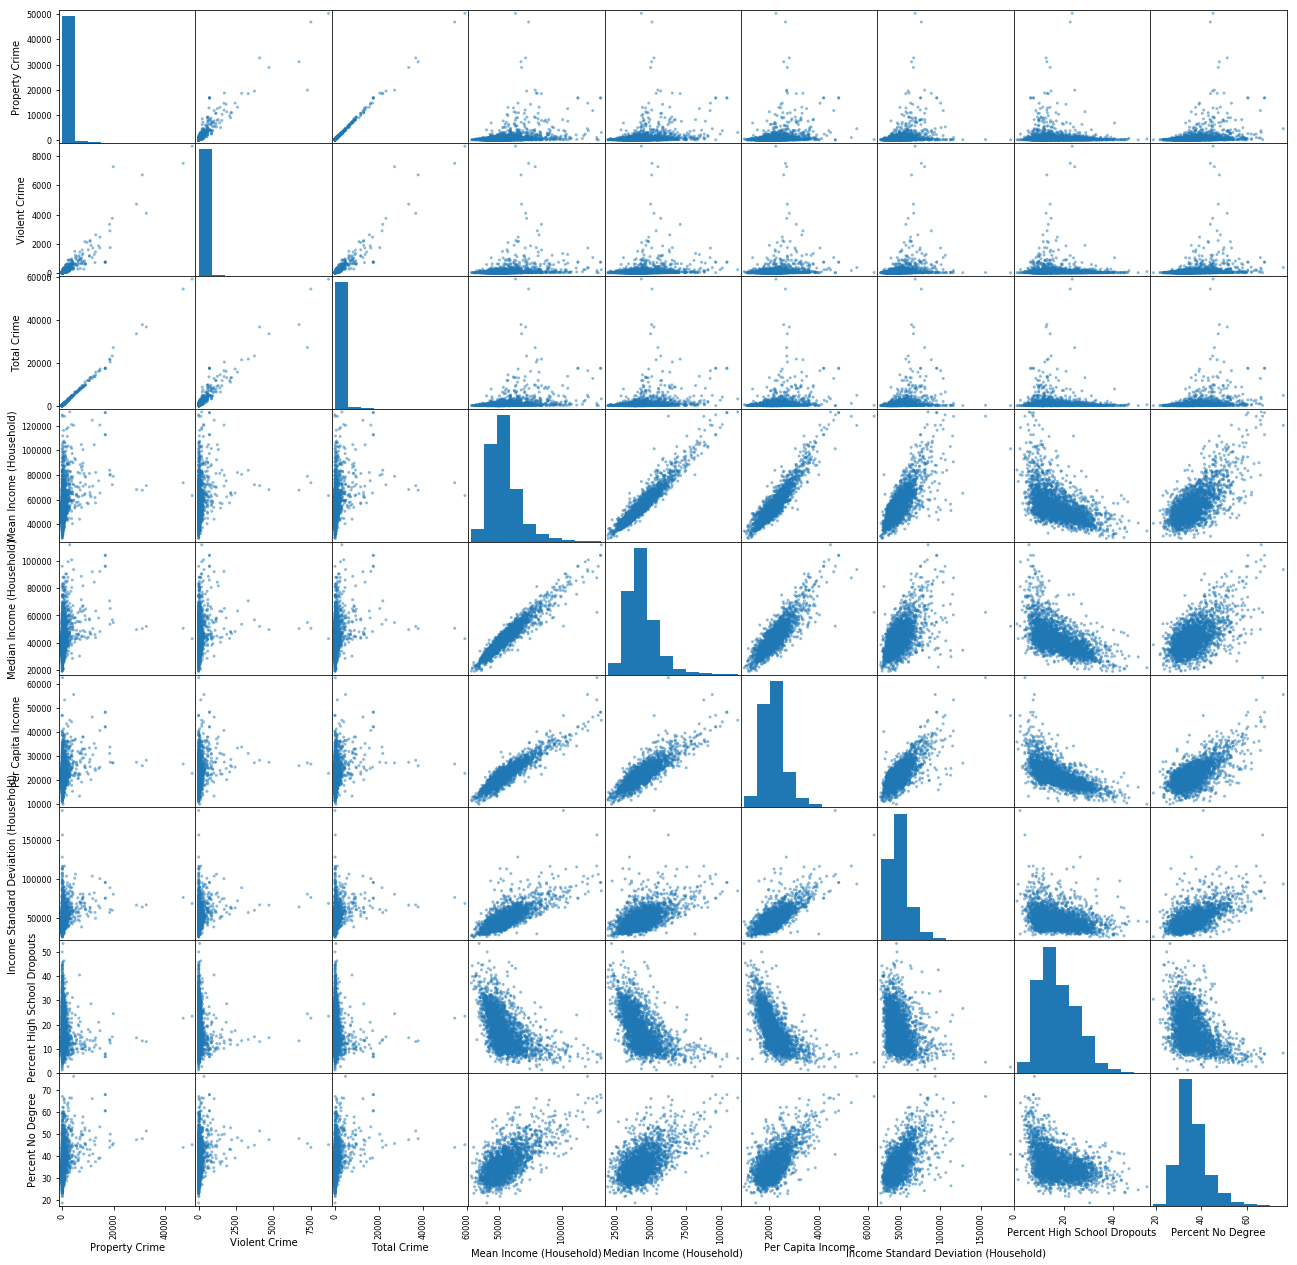

In [6]:
pd.plotting.scatter_matrix(data, figsize=(22, 22))
plt.show()

#### Plotting correlations between similar types of features

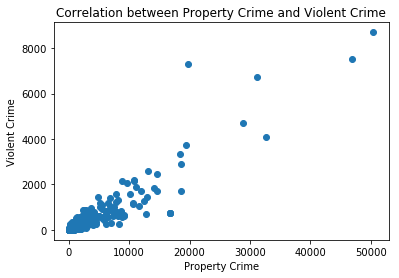

In [7]:
plt.scatter(data['Property Crime'],data['Violent Crime'])  
plt.xlabel('Property Crime')
plt.ylabel('Violent Crime')
plt.title('Correlation between Property Crime and Violent Crime')
plt.show()

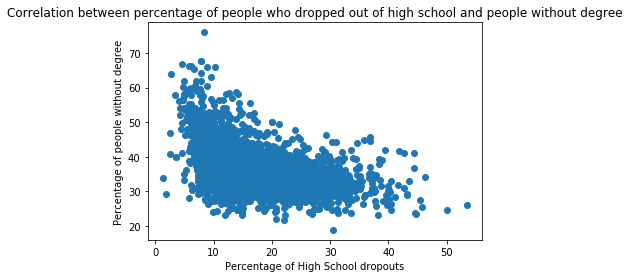

In [8]:
plt.scatter(data['Percent High School Dropouts'],data['Percent No Degree'])  
plt.xlabel('Percentage of High School dropouts')
plt.ylabel('Percentage of people without degree')
plt.title('Correlation between percentage of people who dropped out of high school and people without degree')
plt.show()

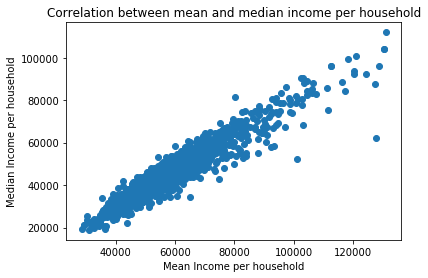

In [9]:
plt.scatter(data['Mean Income (Household)'],data['Median Income (Household)'])  
plt.xlabel('Mean Income per household')
plt.ylabel('Median Income per household')
plt.title('Correlation between mean and median income per household')
plt.show()

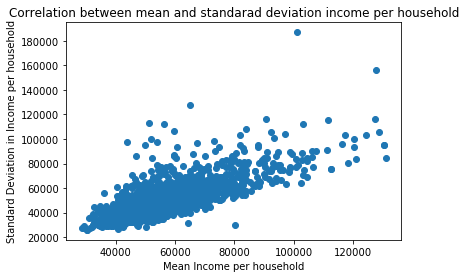

In [10]:
plt.scatter(data['Mean Income (Household)'],data['Income Standard Deviation (Household)'])  
plt.xlabel('Mean Income per household')
plt.ylabel('Standard Deviation in Income per household')
plt.title('Correlation between mean and standarad deviation income per household')
plt.show()

#### Plotting correlation between Per Capita Income, Education Level and Total Crime 

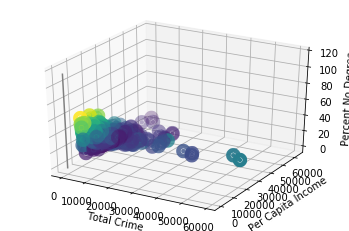

In [11]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 115, 10000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = data['Percent High School Dropouts']
xdata = data['Total Crime']
ydata = data['Per Capita Income']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis', linewidth=10);
ax.set_xlabel('Total Crime')
ax.set_ylabel('Per Capita Income')
ax.set_zlabel('Percent No Degree');

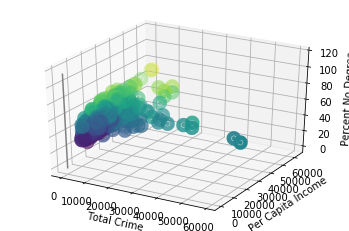

In [12]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 115, 10000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = data['Percent No Degree']
xdata = data['Total Crime']
ydata = data['Per Capita Income']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis', linewidth=10);
ax.set_xlabel('Total Crime')
ax.set_ylabel('Per Capita Income')
ax.set_zlabel('Percent No Degree');

#### Getting features and label and performing few transformations

In [13]:
X = reader.get_features('dropout', 'mean')
y = reader.get_label('violent')
y = np.power(np.log1p(y),1/2)

In [14]:
from collections import OrderedDict
class Row(object):
    
    def __init__(self):
        self.education_type = None
        self.income_type = None
        self.LinearRegMSE = None
        self.RidgeMSE = None
        self.DicisionTreeMSE = None
        self.KNeighbourMSE = None
        self.SVR_MSE = None
        self.RandomForestMSE = None
        self.BoostingMSE = None

    def toDict(self):
        return {'education_type' : self.education_type,
                'income_type' : self.income_type,
                'LinearRegMSE':  self.LinearRegMSE,
                'RidgeMSE' : self.RidgeMSE,
                'DicisionTreeMSE' : self.DicisionTreeMSE,
                'KNeighbourMSE': self.KNeighbourMSE,
                'SVR_MSE' : self.SVR_MSE,
                'RandomForestMSE': self.RandomForestMSE,
                'BoostingMSE' :self.BoostingMSE
               }

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ParameterGrid

import warnings
warnings.filterwarnings("ignore")

param_grid = {"education_type" :["dropout", "degreeless"], "income_type" :["mean", "median", "percapita", "deviation"]}
result = pd.DataFrame()

for param in list(ParameterGrid(param_grid)):
    row = Row()
    row.education_type = param['education_type']
    row.income_type = param['income_type']
    X = reader.get_features(param['education_type'], param['income_type'])
    y = reader.get_label('violent')
    y = np.power(np.log1p(y),1/2)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    
    ## Scale input data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train.to_numpy())
    X_test = scaler.fit_transform(X_test.to_numpy())
    
    ## Liner Regression
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred=linreg.predict(X_test)
    row.LinearRegMSE = metrics.mean_squared_error(y_test, y_pred)
    
    ## Ridge Regression
    ridgereg = Ridge(alpha=1.0)
    ridgereg=ridgereg.fit(X_train,y_train)
    y_pred=ridgereg.predict(X_test)
    row.RidgeMSE = metrics.mean_squared_error(y_test, y_pred)
    
    ## Decision Tree
    regr = DecisionTreeRegressor(max_depth=2)
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    row.DicisionTreeMSE = metrics.mean_squared_error(y_test, y_pred)
    
    ## Random Forest Tree
    regr = RandomForestRegressor(max_depth=2)
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    row.RandomForestMSE = metrics.mean_squared_error(y_test, y_pred)
    
    ### Boosting
    params = {'n_estimators': 100, 'max_depth': 2}
    clf = GradientBoostingRegressor(**params)
    clf.fit(X_train, y_train)
    row.BoostingMSE = metrics.mean_squared_error(y_test, y_pred)
    
    ### KNN
    neigh = KNeighborsRegressor(n_neighbors=3)
    neigh.fit(X_train, y_train) 
    y_pred=neigh.predict(X_test)
    row.KNeighbourMSE = metrics.mean_squared_error(y_test, y_pred)
    
    ### SVR
    svr = SVR(gamma='auto')
    svr = svr.fit(X_train, y_train.values.ravel())
    y_pred=svr.predict(X_test)
    row.SVR_MSE = metrics.mean_squared_error(y_test, y_pred)
    
    result = result.append(row.toDict(), ignore_index=True)

result

,BoostingMSE,DicisionTreeMSE,KNeighbourMSE,LinearRegMSE,RandomForestMSE,RidgeMSE,SVR_MSE,education_type,income_type
0,0.215070,0.225283,0.282361,0.213155,0.215070,0.213151,0.204318,dropout,mean
1,0.220147,0.227928,0.313137,0.216551,0.220147,0.216552,0.215962,dropout,median
2,0.230833,0.233913,0.292798,0.226300,0.230833,0.226302,0.225281,dropout,percapita
3,0.225167,0.236042,0.308129,0.228070,0.225167,0.228069,0.221075,dropout,deviation
4,0.216536,0.218496,0.301719,0.213964,0.216536,0.213963,0.217722,degreeless,mean
5,0.219050,0.221014,0.306017,0.214696,0.219050,0.214695,0.220881,degreeless,median
6,0.220941,0.223049,0.300694,0.217077,0.220941,0.217074,0.217676,degreeless,percapita
7,0.219589,0.219942,0.283826,0.216008,0.219589,0.216008,0.214153,degreeless,deviation
